Submission Project
Proyek Pertama : Membuat Model Machine Learning dengan Data Time Series


Data profile
Nama : Handerson Loriano
Email : hadezbladez@gmail.com

In [ ]:

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.layers import Dense, LSTM

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('weather_Bhubhneshwar_1990_2022 - weather_Bhubhneshwar_1990_2022_redoneComp.csv')
df = df.drop(columns=["tmin","tmax","prcp","snow","wdir","wspd","wpgt","pres","tsun"])

df

,time,tavg
0,1990-01-01,20.1
1,1990-01-02,20.7
2,1990-01-03,20.7
3,1990-01-04,18.8
4,1990-01-05,19.8
...,...,...
11930,2022-08-31,29.2
11931,2022-09-01,29.6
11932,2022-09-02,29.7
11933,2022-09-03,29.2


In [ ]:
# Normalization
df["tavg"] = (df["tavg"] - df["tavg"].mean()) / df["tavg"].std()
df

,time,tavg
0,1990-01-01,-1.955358
1,1990-01-02,-1.785328
2,1990-01-03,-1.785328
3,1990-01-04,-2.323755
4,1990-01-05,-2.040372
...,...,...
11930,2022-08-31,0.623425
11931,2022-09-01,0.736779
11932,2022-09-02,0.765117
11933,2022-09-03,0.623425


In [ ]:
# value check
dates = df['time'].values
temp  = df['tavg'].values

df.isnull().sum()


time    0
tavg    0
dtype: int64

In [ ]:
# Threshold
threshold_mae = (df['tavg'].max() - df['tavg'].min()) * 10/100
threshold_mae

0.6149405911657766

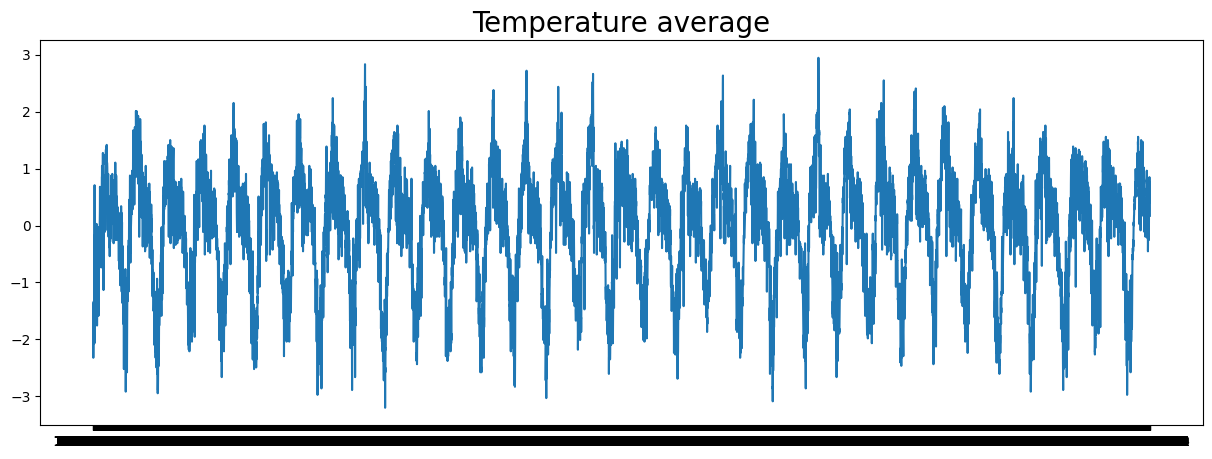

In [ ]:
# plot is hanging so we need superpower of GPU
# is it because we dont scale it?
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [ ]:

dates_latih, dates_test, temp_latih, temp_test = train_test_split(dates, temp, test_size=0.2, shuffle=False)

In [ ]:

# define data

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< 0.1 and logs.get('loss') < 0.2 ):
      print("\nMAE kurang dari < 10%!")
      self.model.stop_training = True
callbacksv = myCallback()


# model bake

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

train_set = windowed_dataset(temp_latih, window_size=60, batch_size=100, shuffle_buffer=1000)

In [ ]:
history = model.fit(train_set, callbacks=[callbacksv],epochs=1219)

Epoch 1/1219
95/95 [==============================] - 6s 22ms/step - loss: 0.1125 - mae: 0.3709
Epoch 2/1219
95/95 [==============================] - 3s 35ms/step - loss: 0.0742 - mae: 0.3002
Epoch 3/1219
95/95 [==============================] - 2s 22ms/step - loss: 0.0667 - mae: 0.2845
Epoch 4/1219
95/95 [==============================] - 2s 22ms/step - loss: 0.0588 - mae: 0.2648
Epoch 5/1219
95/95 [==============================] - 2s 22ms/step - loss: 0.0569 - mae: 0.2612
Epoch 6/1219
95/95 [==============================] - 2s 21ms/step - loss: 0.0558 - mae: 0.2584
Epoch 7/1219
95/95 [==============================] - 3s 35ms/step - loss: 0.0576 - mae: 0.2628
Epoch 8/1219
95/95 [==============================] - 2s 23ms/step - loss: 0.0543 - mae: 0.2538
Epoch 9/1219
95/95 [==============================] - 2s 23ms/step - loss: 0.0547 - mae: 0.2559
Epoch 10/1219
95/95 [==============================] - 2s 22ms/step - loss: 0.0542 - mae: 0.2540
Epoch 11/1219
95/95 [==================